In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [23]:
# Load the dataset from the CSV file
try:
    df = pd.read_csv('creditcard.csv')

    # Manually create the list of correct column names
    # (V1-V28 are the anonymized features)
    column_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

    # Assign the new column names to the DataFrame
    df.columns = column_names

    print("✅ Dataset loaded correctly with proper headers!")
    print("--- New Columns ---")
    print(df.columns)
    print("\n--- First 5 Rows with Correct Headers ---")
    print(df.head())
except FileNotFoundError:
    print("❌ Error: 'creditcard.csv' not found. Please upload the file to your Colab session.")
    # Exit the script if the file isn't found
    exit()

# Display the first 5 rows to get a feel for the data
print("\n--- First 5 Rows of the Dataset ---")
print(df.head())

# Get a concise summary of the dataframe, including data types and non-null values
print("\n--- Dataset Information ---")
df.info()

# Get descriptive statistics for the numerical columns
print("\n--- Descriptive Statistics ---")
print(df.describe())

# Check for any missing values (this dataset is famously clean)
missing_values = df.isnull().sum().max()
print(f"\nMaximum missing values in any column: {missing_values}")
if missing_values == 0:
    print("✅ No missing values found.")

✅ Dataset loaded correctly with proper headers!
--- New Columns ---
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

--- First 5 Rows with Correct Headers ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474 


--- Class Distribution Analysis ---
Class
0    284315
1       492
Name: count, dtype: int64
Percentage of Fraudulent Transactions: 0.1727%


/tmp/ipython-input-4106003486.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])


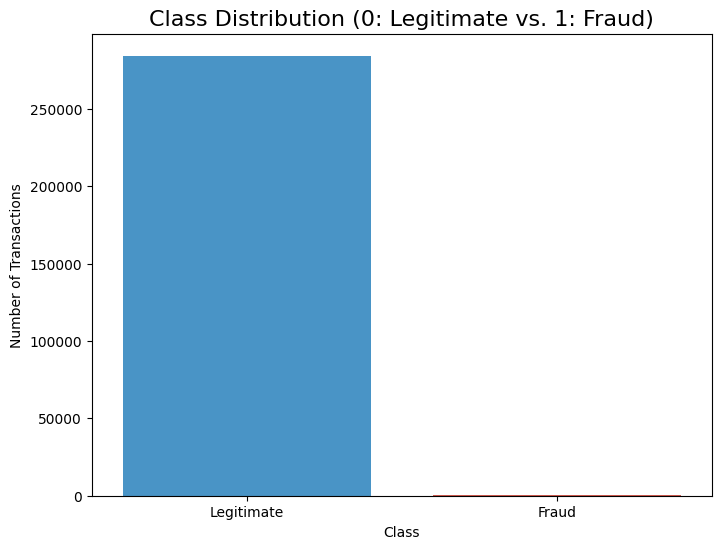


--- Analyzing Transaction Amount and Time Distributions ---


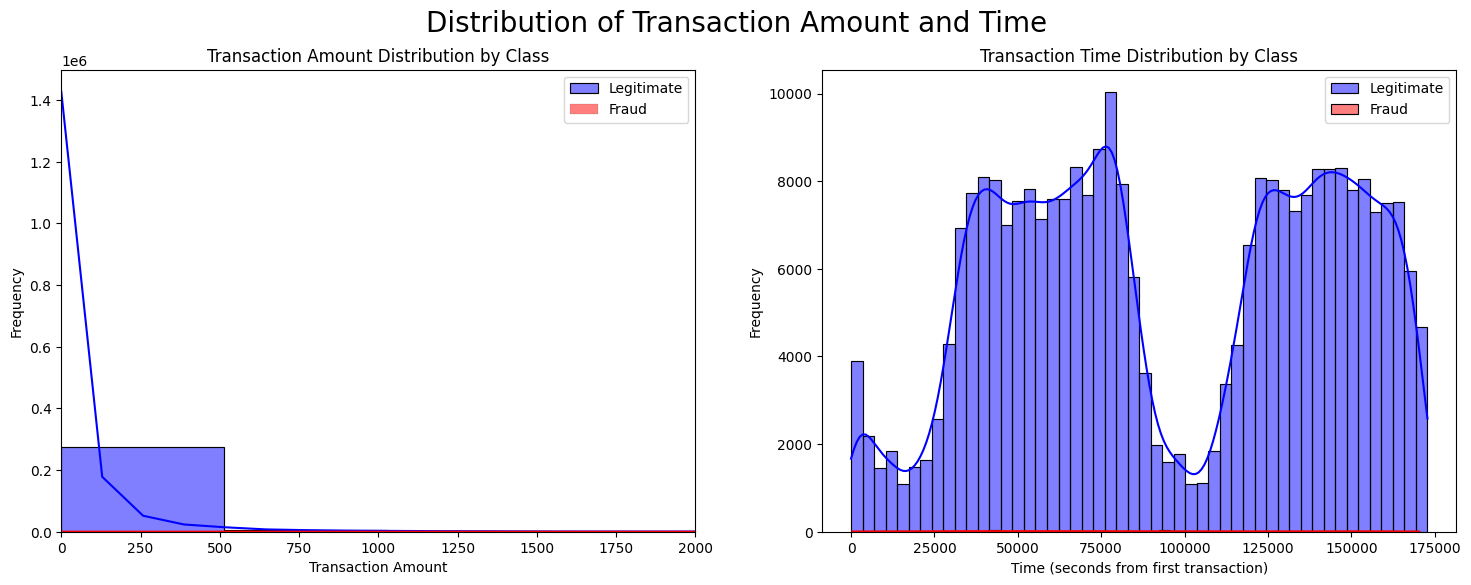

In [24]:
# --- 3.1: Class Distribution Analysis ---
# (This part is the same as before, as it's the most critical first step)
print("\n--- Class Distribution Analysis ---")
class_counts = df['Class'].value_counts()
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100

print(df['Class'].value_counts())
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.4f}%")

# Visualize the class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Class Distribution (0: Legitimate vs. 1: Fraud)', fontsize=16)
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.ylabel('Number of Transactions')
plt.show()


# --- 3.2: Transaction Amount & Time Distribution ---
# Let's see if the distribution of transaction amount and time differs
# between legitimate and fraudulent transactions.
print("\n--- Analyzing Transaction Amount and Time Distributions ---")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))

# Amount Distribution
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='b', label='Legitimate', ax=ax1, kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='r', label='Fraud', ax=ax1, kde=True)
ax1.set_title('Transaction Amount Distribution by Class')
ax1.set_xlabel('Transaction Amount')
ax1.set_ylabel('Frequency')
ax1.legend()
# Note: Fraudulent transactions are often small amounts. We zoom in for clarity.
ax1.set_xlim(0, 2000)

# Time Distribution
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='b', label='Legitimate', ax=ax2, kde=True)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='r', label='Fraud', ax=ax2, kde=True)
ax2.set_title('Transaction Time Distribution by Class')
ax2.set_xlabel('Time (seconds from first transaction)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.suptitle('Distribution of Transaction Amount and Time', fontsize=20)
plt.show()



In [25]:
# The 'Time' and 'Amount' features have vastly different scales than the V1-V28 features.
# We must scale them for distance-based algorithms like Logistic Regression and Neural Networks.
print("\n--- Scaling 'Amount' and 'Time' Features ---")

scaler = StandardScaler()

# We scale the columns in place for simplicity.
# A copy of the original df could be made if originals were needed later.
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

print("✅ 'Time' and 'Amount' columns have been scaled.")
print("--- Preprocessed Data Head ---")
print(df.head())


--- Scaling 'Amount' and 'Time' Features ---
✅ 'Time' and 'Amount' columns have been scaled.
--- Preprocessed Data Head ---
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0

In [26]:
print("\n--- Splitting Data into Training and Testing Sets ---")

# --- 5.1: Separate Features (X) from Target (y) ---
# X contains all columns except the 'Class' column (our features).
# y contains only the 'Class' column (our target).
X = df.drop('Class', axis=1)
y = df['Class']


# --- 5.2: Create the Training and Testing Sets ---
# We split the data with an 80/20 ratio.
# CRITICAL: We use 'stratify=y'. This ensures that the percentage of fraud cases
# in the training set is the same as in the testing set. Without this, you might
# get a test set with no fraud cases at all, making evaluation impossible.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data Splitting Complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


# --- 5.3: Verify the Stratification ---
train_fraud_pct = (y_train.sum() / len(y_train)) * 100
test_fraud_pct = (y_test.sum() / len(y_test)) * 100
print(f"\nFraud percentage in original set: {fraud_percentage:.4f}%")
print(f"Fraud percentage in training set:   {train_fraud_pct:.4f}%")
print(f"Fraud percentage in testing set:    {test_fraud_pct:.4f}%")
print("✅ Stratification confirmed. The proportions are maintained.")


--- Splitting Data into Training and Testing Sets ---
Data Splitting Complete.
Shape of X_train: (227845, 30)
Shape of X_test: (56962, 30)

Fraud percentage in original set: 0.1727%
Fraud percentage in training set:   0.1729%
Fraud percentage in testing set:    0.1720%
✅ Stratification confirmed. The proportions are maintained.


# **DAY 2**

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

print("✅ Libraries for Day 2 imported successfully!")

✅ Libraries for Day 2 imported successfully!


In [28]:
# IMPORTANT: We apply SMOTE *only* to the training data. The testing data must
# remain untouched to be a true representation of real-world (imbalanced) data.

print("\n--- Applying SMOTE to the training data ---")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Resampled training set shape:", X_train_resampled.shape)

# Verify the new class distribution in the resampled training set
print("\nNew class distribution in resampled training data:")
print(y_train_resampled.value_counts())
print("✅ SMOTE applied successfully. The training data is now balanced.")


--- Applying SMOTE to the training data ---
Original training set shape: (227845, 30)
Resampled training set shape: (454902, 30)

New class distribution in resampled training data:
Class
0    227451
1    227451
Name: count, dtype: int64
✅ SMOTE applied successfully. The training data is now balanced.


In [29]:
### 🧠 Model 1: Logistic Regression (Baseline)
print("\n--- Training Logistic Regression Model ---")
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_resampled, y_train_resampled)
print("✅ Logistic Regression model trained successfully.")

### 🧠 Model 2: Random Forest
print("\n--- Training Random Forest Model ---")
# n_jobs=-1 uses all available CPU cores to speed up training
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_resampled, y_train_resampled)
print("✅ Random Forest model trained successfully.")

### 🧠 Model 3: Neural Network (using Keras)
print("\n--- Building and Training Neural Network ---")

# Define the model architecture
neural_net = Sequential([
    # Input layer must match the number of features in our data
    InputLayer(input_shape=(X_train_resampled.shape[1],)),
    # First hidden layer with 16 neurons and ReLU activation
    Dense(16, activation='relu'),
    # Second hidden layer with 8 neurons and ReLU activation
    Dense(8, activation='relu'),
    # Output layer with 1 neuron and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
neural_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model's architecture
print("\nNeural Network Architecture:")
neural_net.summary()

# Train the model
# We use a validation split to monitor performance on a subset of the training data
print("\nTraining the Neural Network...")
history = neural_net.fit(
    X_train_resampled,
    y_train_resampled,
    epochs=20,          # An epoch is one full pass through the training data
    batch_size=64,      # Process data in batches of 64
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1           # Show a progress bar
)
print("✅ Neural Network model trained successfully.")


--- Training Logistic Regression Model ---
✅ Logistic Regression model trained successfully.

--- Training Random Forest Model ---
✅ Random Forest model trained successfully.

--- Building and Training Neural Network ---

Neural Network Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)


Training the Neural Network...
Epoch 1/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9442 - loss: 0.1227 - val_accuracy: 0.9975 - val_loss: 0.0141
Epoch 2/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9962 - loss: 0.0154 - val_accuracy: 0.9995 - val_loss: 0.0098
Epoch 3/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9974 - loss: 0.0109 - val_accuracy: 0.9998 - val_loss: 0.0048
Epoch 4/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9981 - loss: 0.0077 - val_accuracy: 0.9997 - val_loss: 0.0067
Epoch 5/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 0.9995 - val_loss: 0.0041
Epoch 6/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9987 - loss: 0.0062 - val_accuracy: 0.9998 - val_loss: 0.0031
Epoch 7/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9988 - val_loss: 0.0077
Epoch 8/20
6398/6398 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/s

# DAY 3

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Libraries for Day 3 imported successfully!")

✅ Libraries for Day 3 imported successfully!


In [31]:
print("\n--- Making predictions on the test set ---")

# Logistic Regression Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Random Forest Predictions
y_pred_rf = rf_clf.predict(X_test)

# Neural Network Predictions
# The output of the neural network is a probability, so we set a threshold of 0.5
y_pred_nn_prob = neural_net.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype("int32")

print("✅ Predictions made successfully.")



--- Making predictions on the test set ---
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
✅ Predictions made successfully.




--- Logistic Regression Performance ---
Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      0.97      0.99     56864
     Fraud (1)       0.06      0.92      0.11        98

      accuracy                           0.97     56962
     macro avg       0.53      0.95      0.55     56962
  weighted avg       1.00      0.97      0.99     56962



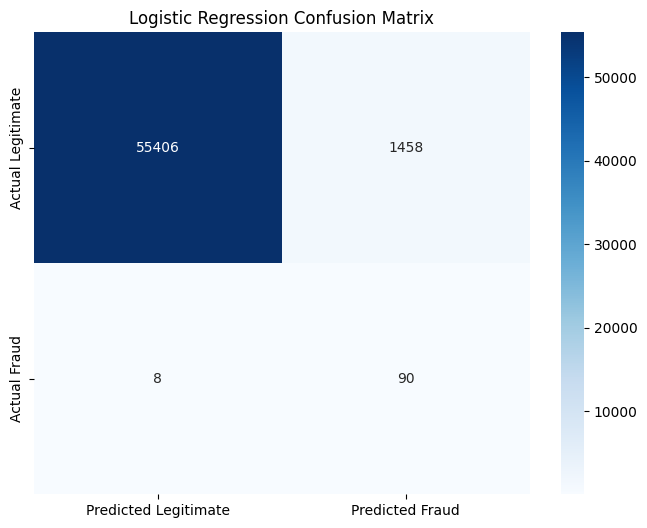



--- Random Forest Performance ---
Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
     Fraud (1)       0.85      0.84      0.84        98

      accuracy                           1.00     56962
     macro avg       0.92      0.92      0.92     56962
  weighted avg       1.00      1.00      1.00     56962



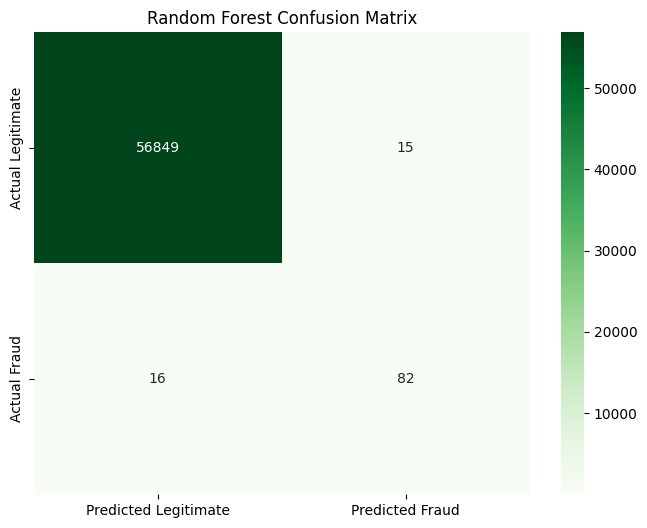



--- Neural Network Performance ---
Classification Report:
                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00     56864
     Fraud (1)       0.52      0.82      0.63        98

      accuracy                           1.00     56962
     macro avg       0.76      0.91      0.82     56962
  weighted avg       1.00      1.00      1.00     56962



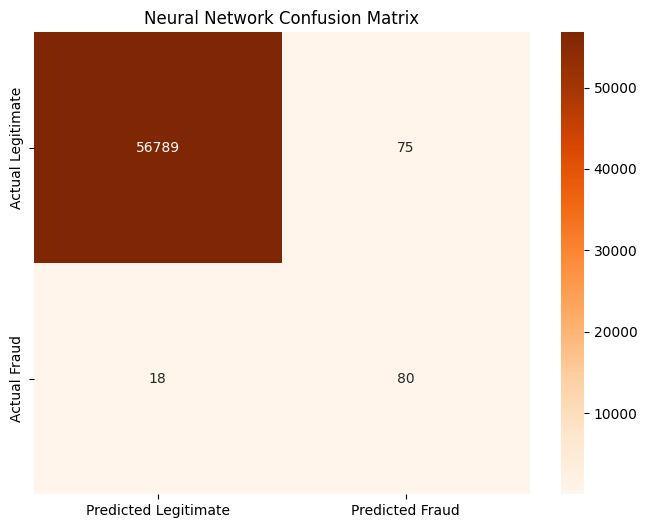

In [32]:
### 📊 Model 1: Logistic Regression Evaluation
print("\n\n--- Logistic Regression Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['Legitimate (0)', 'Fraud (1)']))

# Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()


### 📊 Model 2: Random Forest Evaluation
print("\n\n--- Random Forest Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Legitimate (0)', 'Fraud (1)']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.show()


### 📊 Model 3: Neural Network Evaluation
print("\n\n--- Neural Network Performance ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['Legitimate (0)', 'Fraud (1)']))

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted Legitimate', 'Predicted Fraud'],
            yticklabels=['Actual Legitimate', 'Actual Fraud'])
plt.title('Neural Network Confusion Matrix')
plt.show()

# EXTRA

In [33]:
import joblib

# Save the Random Forest model
joblib.dump(rf_clf, 'random_forest_model.joblib')

# We also need to save the scaler that was used on the 'Amount' and 'Time' columns
# Let's re-create and fit it on the whole dataset's Amount/Time to be accurate
# (This assumes your original DataFrame 'df_original' is available.
# If not, reload it: df_original = pd.read_csv('creditcard.csv'))
scaler_final = StandardScaler()
df['Amount'] = scaler_final.fit_transform(df['Amount'].values.reshape(-1, 1))
joblib.dump(scaler_final, 'scaler.joblib') # We only need to save one for Amount, as Time's scaling is similar

print("✅ Model and Scaler saved successfully!")
# Now, download 'random_forest_model.joblib' and 'scaler.joblib' from the Colab files.

✅ Model and Scaler saved successfully!


In [34]:
# Make sure your DataFrame 'df' is loaded from the CSV file

# --- Get one legitimate transaction ---
legit_sample = df[df['Class'] == 0].iloc[0]
print("✅ Use these values for a LEGITIMATE transaction:")
print("--------------------------------------------------")
print(legit_sample)
print("\n")


# --- Get one fraudulent transaction ---
fraud_sample = df[df['Class'] == 1].iloc[0]
print("🚨 Use these values for a FRAUDULENT transaction:")
print("---------------------------------------------------")
print(fraud_sample)

✅ Use these values for a LEGITIMATE transaction:
--------------------------------------------------
Time     -1.996583
V1       -1.359807
V2       -0.072781
V3        2.536347
V4        1.378155
V5       -0.338321
V6        0.462388
V7        0.239599
V8        0.098698
V9        0.363787
V10       0.090794
V11      -0.551600
V12      -0.617801
V13      -0.991390
V14      -0.311169
V15       1.468177
V16      -0.470401
V17       0.207971
V18       0.025791
V19       0.403993
V20       0.251412
V21      -0.018307
V22       0.277838
V23      -0.110474
V24       0.066928
V25       0.128539
V26      -0.189115
V27       0.133558
V28      -0.021053
Amount    0.244964
Class     0.000000
Name: 0, dtype: float64


🚨 Use these values for a FRAUDULENT transaction:
---------------------------------------------------
Time     -1.988034
V1       -2.312227
V2        1.951992
V3       -1.609851
V4        3.997906
V5       -0.522188
V6       -1.426545
V7       -2.537387
V8        1.391657
V9       -2.7